<ipython-input-1-9a067835a425>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['f_empirical'][i] = z/frequency


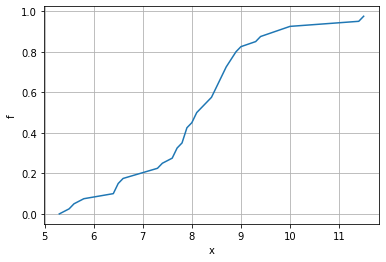

In [1]:
import numpy as np
import pandas as pd
from scipy.special import erf
import matplotlib.pyplot as plt

db = np.array([8.2, 5.6, 8.0, 8.5, 6.5, 8.7, 8.4, 8.7, 5.5, 9.4, 11.5, 7.8, 9.3, 8.1, 7.3, 8.6, 6.6, 5.8, 7.9, 8.5, 7.8, 6.4, 10.0, 8.2, 6.4, 8.7, 6.6, 9.4, 5.3, 7.6, 11.4, 7.7, 7.4, 8.0, 8.6, 9.0, 8.9, 8.4, 7.6, 7.8])

df = pd.DataFrame({'element': [5.3, 5.5, 5.6, 5.8, 6.4, 6.5, 6.6, 7.3, 7.4, 7.6, 7.7, 7.8, 7.9, 8.0, 8.1, 8.2, 8.4, 8.5, 8.6, 8.7, 8.9, 9.0, 9.3, 9.4, 10.0, 11.4, 11.5],
                  'frequency': [1,1,1,1,2,1,2,1,1,2,1,3,1,2,1,2,2,2,2,3,1,1,1,2,1,1,1]})


# Частота(всего элементов)
frequency = df['frequency'].sum()

# Задание 2
df['f_empirical'] = np.zeros(len(df))
z = 0
for i in range(1, len(df), 1):
    z+= df['frequency'][i - 1]
    df['f_empirical'][i] = z/frequency
plt.grid()
plt.ylabel('f')
plt.xlabel('x')
plt.plot(df['element'], df['f_empirical'])


In [2]:
## Задание 3
# Столбцы Значений
df['sample_mean'] = np.zeros(len(df))
df['sample_dispersion'] = np.zeros(len(df))

# Медиана
mediana = df['element'].median()

# Выборочная мода
Mo = 8.7

# Выборочное среденее(мат. ожидание)
for i in range(len(df)): # Сделать красиво!!!!
    df['sample_mean'][i] = df['element'][i] * df['frequency'][i]

sample_mean = df['sample_mean'].sum()/frequency # Выброчное среднее

# Выборачная дисперсия
for i in range(len(df)):
    df['sample_dispersion'][i] = (df['element'][i] - sample_mean)**2 * df['frequency'][i]

sample_dispersion = df['sample_dispersion'].sum()/frequency # Выборочная дисперсия    
corrected_dispersion = frequency/(frequency - 1) * sample_dispersion # Исправленная диссперсия
f = df['f_empirical'].sum() # Вероятность
corrected_standard_deviation = corrected_dispersion**(1/2) # Исправленное ср. кв. отклонение

df

<ipython-input-2-3c88815d3a0e>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sample_mean'][i] = df['element'][i] * df['frequency'][i]
<ipython-input-2-3c88815d3a0e>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sample_dispersion'][i] = (df['element'][i] - sample_mean)**2 * df['frequency'][i]


,element,frequency,f_empirical,sample_mean,sample_dispersion
0,5.3,1,0.000,5.3,7.303506
1,5.5,1,0.025,5.5,6.262506
2,5.6,1,0.050,5.6,5.772006
3,5.8,1,0.075,5.8,4.851006
4,6.4,2,0.100,12.8,5.136012
5,6.5,1,0.150,6.5,2.257506
6,6.6,2,0.175,13.2,3.934012
7,7.3,1,0.225,7.3,0.493506
8,7.4,1,0.250,7.4,0.363006
9,7.6,2,0.275,15.2,0.324012


In [3]:
corrected_standard_deviation

1.3881342394259522

In [8]:
## Задание 4 Интервальная группировка

k = 1 + np.log2(len(db))
l = (df['element'].max() - df['element'].min())/6 # Шаг
# print(l)
i = 0
interval_groupping = np.array([df['element'].min()])


while interval_groupping[i] <= df['element'].max():
    interval_groupping = np.append(interval_groupping, interval_groupping[i] + l)
    i+=1
    
interval_groupping = np.delete(interval_groupping, len(interval_groupping) - 1)

df_interval_groupping = pd.DataFrame({'interval_groupping': interval_groupping})

df_interval_groupping['mi'] = [0, 4, 6, 15, 12, 1, 2]
df_interval_groupping['hi'] = np.zeros(len(df_interval_groupping))
df_interval_groupping['hi/l'] = np.zeros(len(df_interval_groupping))

for i in range(1, len(df_interval_groupping), 1):
    df_interval_groupping['hi'][i] = df_interval_groupping['mi'][i]/(df_interval_groupping['interval_groupping'][i] - df_interval_groupping['interval_groupping'][i - 1])
    df_interval_groupping['hi/l'][i] = df_interval_groupping['hi'][i]/l

print(l)
df_interval_groupping

1.0333333333333334


<ipython-input-8-fe1230d31658>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_interval_groupping['hi'][i] = df_interval_groupping['mi'][i]/(df_interval_groupping['interval_groupping'][i] - df_interval_groupping['interval_groupping'][i - 1])
<ipython-input-8-fe1230d31658>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_interval_groupping['hi/l'][i] = df_interval_groupping['hi'][i]/l


,interval_groupping,mi,hi,hi/l
0,5.300000,0,0.000000,0.000000
1,6.333333,4,3.870968,3.746098
2,7.366667,6,5.806452,5.619147
3,8.400000,15,14.516129,14.047867
4,9.433333,12,11.612903,11.238293
5,10.466667,1,0.967742,0.936524
6,11.500000,2,1.935484,1.873049


In [5]:
## Задание 6 Проверить гипотезу о соответствии распределения нормальному закону с пара-метрамиμиσ(даны в таблице для каждого варианта) с помощью критерияПирсона.

expected_value = 8 # мат. ожидание
standard_deviation = 1.5 # ср.кв. отклонение

df_interval_groupping['phi'] = np.zeros(len(df_interval_groupping))
df_interval_groupping['pi'] = np.zeros(len(df_interval_groupping))
df_interval_groupping['mi_t'] = np.zeros(len(df_interval_groupping))
df_interval_groupping['(mi - mi_t)**2/mi_t'] = np.zeros(len(df_interval_groupping))
Phi = lambda x: erf(x/2**0.5)/2 # Значение функции Лапласа
df_interval_groupping['phi'][0] = Phi((df_interval_groupping['interval_groupping'][0] - expected_value)/standard_deviation)

for i in range(1, len(df_interval_groupping), 1):
    df_interval_groupping['phi'][i] = Phi((df_interval_groupping['interval_groupping'][i] - expected_value)/standard_deviation)
    df_interval_groupping['pi'][i] = df_interval_groupping['phi'][i] - df_interval_groupping['phi'][i-1]
    df_interval_groupping['mi_t'][i] = df_interval_groupping['pi'][i] * frequency
    df_interval_groupping['(mi - mi_t)**2/mi_t'][i] = ((df_interval_groupping['mi'][i] - df_interval_groupping['mi_t'][i])**2)/df_interval_groupping['mi_t'][i]
    

t = df_interval_groupping['(mi - mi_t)**2/mi_t'].sum() # Критерий
alpha = 0.01 # уровень значимости
k_freedom = 3

hi_square_critical = 11.3449
print('t = ', t)
print('hi = ', hi_square_critical)

# t > hi_square_critical => расп похоже на нормальное
## Задание 7
# уровень значимости принимаем равным 0.01
df_interval_groupping

t =  6.323034133953632
hi =  11.3449


<ipython-input-5-80328c3e0f26>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_interval_groupping['phi'][0] = Phi((df_interval_groupping['interval_groupping'][0] - expected_value)/standard_deviation)
<ipython-input-5-80328c3e0f26>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_interval_groupping['phi'][i] = Phi((df_interval_groupping['interval_groupping'][i] - expected_value)/standard_deviation)
<ipython-input-5-80328c3e0f26>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_g

,interval_groupping,mi,hi,hi/l,phi,pi,mi_t,(mi - mi_t)**2/mi_t
0,5.300000,0,0.000000,0.000000,-0.464070,0.000000,0.000000,0.000000
1,6.333333,4,3.870968,3.746098,-0.366740,0.097330,3.893198,0.002930
2,7.366667,6,5.806452,5.619147,-0.163569,0.203171,8.126846,0.556609
3,8.400000,15,14.516129,14.047867,0.105137,0.268706,10.748227,1.681912
4,9.433333,12,11.612903,11.238293,0.330352,0.225214,9.008580,0.993341
5,10.466667,1,0.967742,0.936524,0.449958,0.119606,4.784248,2.993267
6,11.500000,2,1.935484,1.873049,0.490185,0.040227,1.609075,0.094975


In [6]:
## Задание 8 Найти доверительные интервалы для математического ожидания и дисперсии впредположении, что случайная величина распределена по нормальному закону.

a = 0.01
omega = 0.98

# Для неизвестной дисперсии
border_1 = -1 * (a * corrected_standard_deviation/frequency**(1/2)) + sample_mean # Граница 1
border_2 = sample_mean + (a * frequency**(1/2))/corrected_standard_deviation # Граница 2
# border_1 < мат. ожидание < border_2 с надежностью 0.98
print('Граница_1, Граница_2', border_1, border_2)
a = 21.43
b = 62.43


border_1 = corrected_standard_deviation**2 * (frequency - 1)/b
border_2 = corrected_standard_deviation**2 * (frequency - 1)/a
print('Граница_1, Граница_2', border_1,border_2)

# Доверительынй интервал для дисперсии с надежностью 0.98 border_1 < дисперсия < border_2

8.000305167052673 8.048061554068086
1.2037441934967164 3.5067545496966868


In [7]:
## Задание 9 Проверить гипотезу о том, что рассматриваемая выборка действительно являет-ся набором независимых значений случайной величины

z_1 = k_freedom**(-1) * alpha/2
z_2 = k_freedom**(-1) * (1 - alpha/2)

print(z_1)
print(z_2)


df_appraisal = pd.DataFrame({'element': df['element'], 'f_empirical': df['f_empirical']})
df_appraisal['f_empirical_1'] = np.zeros(len(df_appraisal))
df_appraisal['f'] = np.zeros(len(df_appraisal))
for i in range(len(df_appraisal) - 1):
    df_appraisal['f_empirical_1'][i] = df_appraisal['f_empirical'][i + 1]
    df_appraisal['f'][i] = 0.5 + Phi((df_appraisal['element'][i] - expected_value)/standard_deviation)
    
df_appraisal['f_empirical_1'][len(df_appraisal) - 1] = 1
df_appraisal['f'][len(df_appraisal) - 1] = 0.5 + Phi((df_appraisal['element'][len(df_appraisal) - 1] - expected_value)/standard_deviation)
df_appraisal['f-f_empirical'] = abs(df_appraisal['f'] - df_appraisal['f_empirical'])
df_appraisal['f-f_empirical_1'] = abs(df_appraisal['f'] - df_appraisal['f_empirical_1'])

print(df_appraisal['f-f_empirical'].max())
print(df_appraisal['f-f_empirical_1'].max())
df_appraisal

0.0016666666666666666
0.33166666666666667
0.11986291046402503
0.12036919090127063


,element,f_empirical,f_empirical_1,f,f-f_empirical,f-f_empirical_1
0,5.3,0.000,0.025,0.035930,0.035930,0.010930
1,5.5,0.025,0.050,0.047790,0.022790,0.002210
2,5.6,0.050,0.075,0.054799,0.004799,0.020201
3,5.8,0.075,0.100,0.071233,0.003767,0.028767
4,6.4,0.100,0.150,0.143061,0.043061,0.006939
5,6.5,0.150,0.175,0.158655,0.008655,0.016345
6,6.6,0.175,0.225,0.175324,0.000324,0.049676
7,7.3,0.225,0.250,0.320369,0.095369,0.070369
8,7.4,0.250,0.275,0.344578,0.094578,0.069578
9,7.6,0.275,0.325,0.394863,0.119863,0.069863
